## Install your dependencies

For this tutorial we will a use few core AI/ML core libraries that will make our work easier without us having to rewrite everthing from stratch. To get started we will need to run the code cell below to install the these libraries.

NB: The code below is optional if you already have some experience with machine learn and have these libraries installed.


In [1]:
# # Run the cell below to install the libraries that we will use for this tutorial
# %pip install scikit-learn  # For machine learning algorithms
# %pip install numpy  # For matrix operations and other advance mathematics stuff not required for this tutorial
# %pip install pandas # For loading and manipulating datasets
# %pip install matplotlib  # For making various kinds of plots and charts to visualize data
# print("Successfully installed all libraries")


## Set up the notebook

There are a few lines of code that you will need to write the on top of every notebook to import libraries that your code will depend on like those we intalled above.


In [2]:
# run the code below to import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the data

It is time to now load the dataset we will be working with. We will use the Pandas library to read the csv file containing our data into a dataframe. (what is a dataframe). Run the cell below to load the data.


In [3]:
# Run this cell to load the data.
cpicta_dataset_path = "../data/cpicta_quantseq_with_estimated_ages_dataset.csv"
cpicta_df = pd.read_csv(cpicta_dataset_path, index_col=0)

## Examine the data

We can begin by inspecting the dataset to check for missing values, assess the size, and understand the distribution of each feature. Identifying any gaps in the data early allows us to handle missing values appropriately and prepare the dataset for analysis.

Visualizing the data can also provide insights into how different features relate to the target variable. With only one or two features, plotting relationships directly is manageable, but as the number of features increases, it becomes more challenging to visualize them all in a single plot.

To demonstrate data visualization with multiple features, we can simplify by creating plots that represent each feature's unique values and comparing them with the target variable. This approach can help us get a rough sense of how features vary with respect to the target. For example, we could plot each unique feature value on the x-axis and its corresponding target values on the y-axis, which may reveal trends, clusters, or other patterns in the data.


In [4]:
# We only inspect the head
# Using head() method prints the first five rows. It is helpful for checking number of columns
cpicta_df.head()

,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,...,rna52129,rna52130,rna52131,rna52132,rna52133,rna52134,rna52135,rna52136,rna52137,EstAge
A02_F,1,19,4,0,1,110,0,135,140,1,...,0,4,2,0,35,1,4,1,27,4.0
A03_F,2,18,2,0,2,106,0,122,314,3,...,2,9,1,2,38,2,8,6,35,4.0
A07_F,4,29,9,0,2,94,2,163,582,1,...,0,1,4,0,14,0,16,1,31,8.0
A11_F,5,14,4,0,1,71,9,167,345,1,...,7,6,2,0,41,1,27,4,93,9.0
B01_F,2,11,2,0,1,136,0,93,175,0,...,0,1,1,0,9,0,5,0,41,6.0


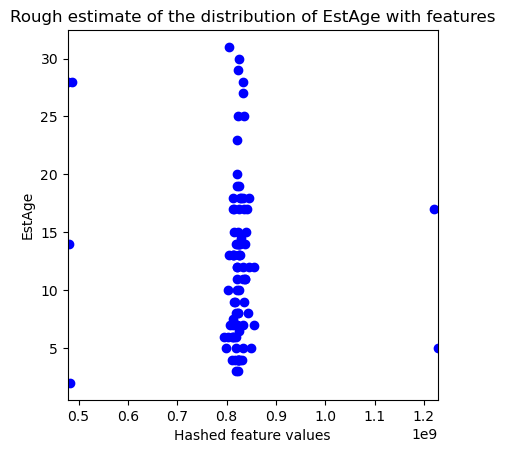

In [5]:
# A plot to make a rough estimate of the data distribution
from plot_util import scatter_plot

scatter_plot(cpicta_df, "EstAge")


# Linear Regression

We will now dive into the our first machine learning algorithm. Supplementary information on linear regression can be found [here](https://www.geeksforgeeks.org/ml-linear-regression/) for those interested.


In [6]:
# We make a copy of the dataset preserve the original dataset
df_copy1 = cpicta_df.copy()
# split data into test and train sets
target = df_copy1['EstAge']
# the remaining parts of the dataset are out features
features = df_copy1.drop(columns=['EstAge'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target.to_numpy(), test_size=0.2, random_state=42, shuffle=True)

In [7]:
# Define a linear regression classifier (model) for our task
linreg_clf = LinearRegression() 

# Use the model to fit (estimate / train) our data
linreg_clf.fit(X_train, y_train)

# Predict the value of the X_test data using the model
y_pred_linreg = linreg_clf.predict(X_test)

# Calculate R^2 score: 1 is perfect score
score = r2_score(y_test, y_pred_linreg)
print(r"The model score (R^2) is", score)
# Calculate the mean score error
mse = mean_squared_error(y_test, y_pred_linreg)
print("The mean squared error is ", mse)

The model score (R^2) is -0.49440617774461315
The mean squared error is  78.33834489650708


In [8]:
linreg_clf.coef_

array([-5.32049801e-05,  7.21880727e-06, -7.89080319e-07, ...,
       -3.02444491e-07,  3.05826827e-06,  7.48149077e-06])

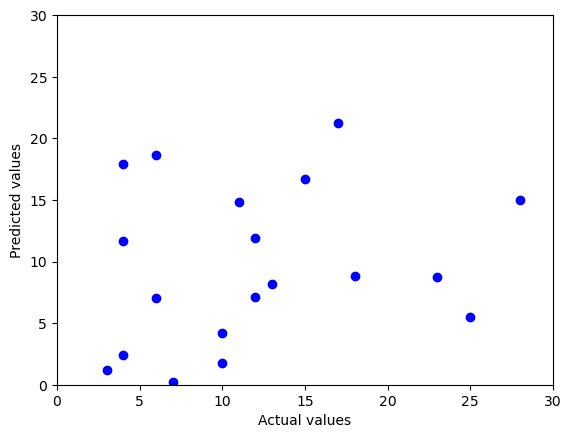

In [9]:
from plot_util import plot_true_vs_pred
plot_true_vs_pred(y_test, y_pred_linreg)

## Scaling can improve performance

Features with large ranges can disproportionately influence the model, potentially degrading performance. Feature scaling standardizes the ranges of features, ensuring they contribute equally to the model. Although scikit-learn offers various feature scaling methods, we will only explore the standard scaler. Refer to the footnote for useful links on feature scaling options and guidelines.


In [10]:
# Using the StandardSCaler to rescale the model
scaler = StandardScaler()

# use X_train to fit the scaler, then transform X_train with the scaler
X_train_scaled = scaler.fit_transform(X_train) # fit_transform does fit and transform at once
# Only transform X_test using the scaler
X_test_scaled = scaler.transform(X_test)

# put the scaled datasets into the pandas dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

# fitting the scaled datasets with the previous model
linreg_clf.fit(X_train_scaled_df, y_train)

# predict the y_test values with model
y_pred_scaled = linreg_clf.predict(X_test_scaled_df)

# the r2 score
scaled_model_score = r2_score(y_test, y_pred_scaled)
print(r"The R^2 score of scaled dataset is ", scaled_model_score)

# The mean squared error
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print("The mean squared error of scaled dataset is: ", mse_scaled)
print(r"We can see that scaling improve the R^2 score and the mean squared error of the model.")


The R^2 score of scaled dataset is  0.10022881454230748
The mean squared error of scaled dataset is:  47.166952669255885
We can see that scaling improve the R^2 score and the mean squared error of the model.


# Logistic Regression

For our logistic regression tutorial, we’ll classify turtles into two age groups: **young** (0) and **old** (1). We’ll use the **median estimated age** of the turtles as our threshold for this classification. Turtles with an estimated age less than the median will belong to the young class, while those with ages equal to or greater than the median will be assigned to the old class.

First, let’s write code to group the turtles based on this threshold. Refer to the code in the initial cells below to see how to perform this grouping.


In [11]:
# Make a copy of the dataset
cpicta_df_copy2 = cpicta_df.copy()

# median of EstAge
median_age = cpicta_df_copy2["EstAge"].median() # 12.0
# Estimate Ages
estimated_age = cpicta_df_copy2.EstAge

# old turtles: turtles with estimated age >= median_age
cpicta_old_df = cpicta_df_copy2[estimated_age >= median_age]
cpicta_old_X = cpicta_old_df.drop(columns=['EstAge']) # drop the EstAge column since its our target
cpicta_old_y = np.ones((cpicta_old_X.shape[0]), dtype=int)
# young_turtles: turtles with estimate age < median_age
cpicta_young_df = cpicta_df_copy2[estimated_age < median_age]
cpicta_young_X = cpicta_young_df.drop(columns=['EstAge'])
cpicta_young_y = np.zeros((cpicta_young_X.shape[0]), dtype=int)


# Print out some information about classes
print("Median turtle age: ", median_age)
print("Number of old turtle: ", cpicta_old_df.shape[0])
print("Number of young turtle: ", cpicta_young_df.shape[0])

Median turtle age:  12.0
Number of old turtle:  48
Number of young turtle:  45


In [12]:
# Split old_turtles class into train and test sets
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(
    cpicta_old_X, cpicta_old_y, test_size=0.2, random_state=42
    )

# Split young_turtles class into train and test sets
X_train_young, X_test_young, y_train_young, y_test_young = train_test_split(
    cpicta_young_X, cpicta_young_y, test_size=0.2, random_state=42
)

# Join the separate classes into one dataset
X_train_logit = pd.concat([X_train_old, X_train_young])
X_test_logit = pd.concat([X_test_old, X_test_young])
y_train_logit = np.concatenate([y_train_old, y_train_young])
y_test_logit = np.concatenate([y_test_old, y_test_young])

# A little sanity check for numbers
print("(#X_train, #y_train) = ", X_train_logit.shape[0], y_train_logit.shape[0])
print("(#X_test, #y_test) = ", X_test_logit.shape[0], y_test_logit.shape[0])

(#X_train, #y_train) =  74 74
(#X_test, #y_test) =  19 19


In [13]:
# Define a logistic regression model
logit_clf = LogisticRegression(solver='liblinear', random_state=42)
# Fit the model
logit_clf.fit(X_train_logit, y_train_logit)
# Predict X_test with the model
y_pred_logit = logit_clf.predict(X_test_logit)

# Caculate the accuracy score of the model - 1 is the best score
# The accuracy gives the fraction of the correct predictions
score_logit = accuracy_score(y_test_logit, y_pred_logit)
print(f"The accuracy score of the model is: {score_logit}")

The accuracy score of the model is: 0.631578947368421


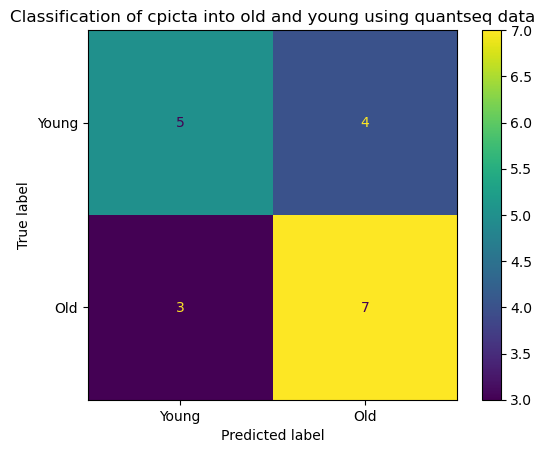

In [14]:
# Confusion Matrix
labels = ["Young", "Old"]
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test_logit, y_pred=y_pred_logit, display_labels=labels)
disp.ax_.set_title("Classification of cpicta into old and young using quantseq data")

plt.show()


## Scaling the dataset for the Logit model

Similar to linear regression, we can also scale the dataset used to fit the logistic regression model by simply using the scaler defined above and then repeat the other codes for logistic regression.


In [16]:
# scale the dataset for the logit model
scaler_logit = StandardScaler()
X_train_logit_scaled = scaler_logit.fit_transform(X_train_logit)
X_test_logit_scaled = scaler_logit.transform(X_test_logit)

# Fit the model
logit_clf.fit(X_train_logit_scaled, y_train_logit)
# Predict X_test with the model
y_pred_logit_scaled = logit_clf.predict(X_test_logit_scaled)

# Caculate the accuracy score of the model - 1 is the best score
# The accuracy gives the fraction of the correct predictions
score_logit_scaled = accuracy_score(y_test_logit, y_pred_logit_scaled)
print(f"The accuracy score of the model is: {score_logit_scaled}")

The accuracy score of the model is: 0.5263157894736842


## Further Reading

0. [Introduction to Kaggle (YouTube)](https://www.youtube.com/watch?v=u9MIwoFWXVg&ab_channel=GeeksforGeeks) and [Kaggle Learn](kaggle.com/learn)
1. [Linear Regression](https://www.geeksforgeeks.org/ml-linear-regression/)
2. [Logistic Regression](https://www.geeksforgeeks.org/understanding-logistic-regression/?ref=header_outind)
3. [Scikit-Learn's Library of Machine Learning tools](https://scikit-learn.org/stable/index.html)
4. [Standford Machine Learning course (YoutTube)](https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU)
